In [1]:
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from scipy.stats import norm,skew, probplot
from scipy.optimize import curve_fit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from lightgbm import LGBMClassifier

from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import itertools
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
train_data = pd.read_csv('/home/siddharth/Desktop/train.csv')
test_data = pd.read_csv('/home/siddharth/Desktop/test.csv')

train_data['Data'] = 'Train'
test_data['Data'] = 'Test'

tt_data = pd.concat([train_data,test_data], axis = 0).reset_index(drop = True)

In [3]:
#Check null values
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [4]:
tt_data['subject'] = '#' + tt_data['subject'].astype(str)

In [5]:
tt_data.shape

(10299, 564)

In [6]:
tt_data.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [7]:
tt_data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [8]:
label = tt_data.pop('Activity')

In [9]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [10]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in tt_data.columns]),
orient = 'index').rename(columns = {0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [11]:
print('Null values in DataFrame:{}\n'.format(tt_data.isna().sum().sum()))
tt_data.info()

Null values in DataFrame:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [12]:
label_counts = label.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0,1.01,1/(n-1))]

data = go.Bar(x = label_counts.index,
             y = label_counts,
             marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                  xaxis = dict(title = 'Activity'),
                  yaxis = dict(title = 'Count'))

fig = go.Figure(data = [data], layout=layout)
iplot(fig)

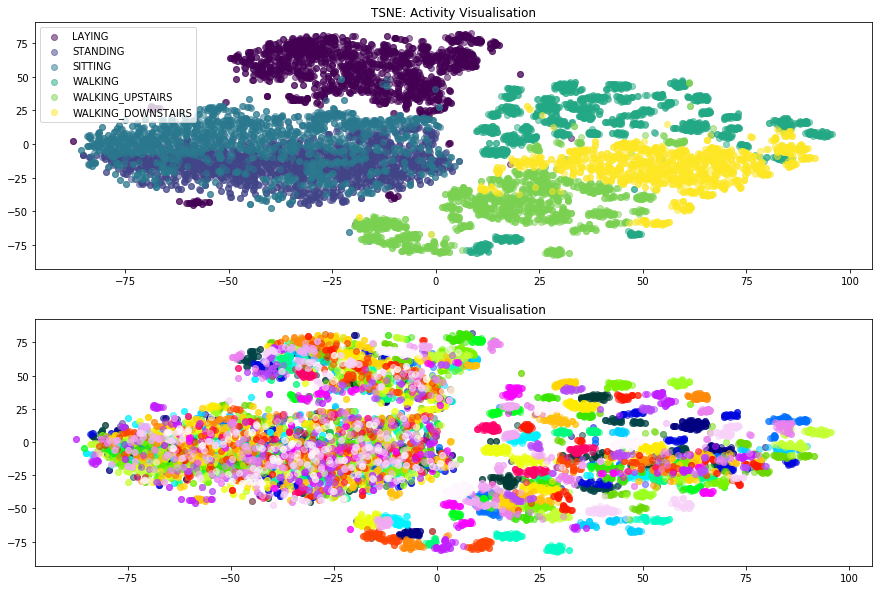

In [13]:
tsne_data = tt_data.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

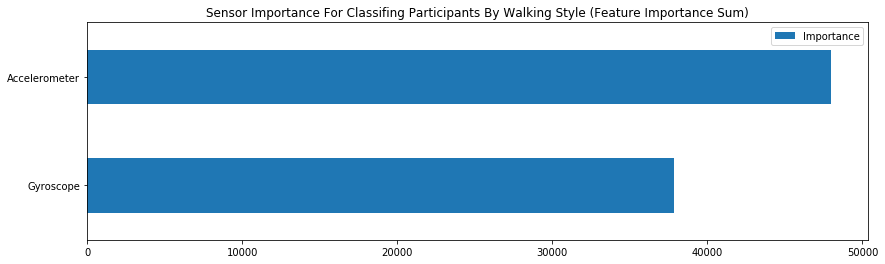

In [14]:
# Create dataset
tsne_data = tt_data[label=='WALKING'].copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(subject_data)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)


# Create model
lgbm = LGBMClassifier(n_estimators=500, random_state=3)
lgbm = lgbm.fit(X_train, y_train)

# Get importances
features = tt_data.drop(['Data', 'subject'], axis=1).columns
importances = lgbm.feature_importances_

# Sum importances
data = {'Gyroscope':0, 'Accelerometer':0}
for importance, feature in zip(importances, features):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance
        
# Create dataframe and plot
sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Style (Feature Importance Sum)')
plt.show()

In [15]:
train_data = pd.read_csv('/home/siddharth/Desktop/train.csv')
test_data = pd.read_csv('/home/siddharth/Desktop/test.csv')

In [16]:
#subject col is not useful hence dropped
if('subject' in train_data.columns):
    train_data.drop('subject', axis=1, inplace=True)
if('subject' in test_data.columns):
    test_data.drop('subject', axis=1, inplace=True)

In [17]:
# Encoding target - converting non-numto num variable
le = preprocessing.LabelEncoder()
for x in [train_data,  test_data]:
    x['Activity'] = le.fit_transform(x.Activity)

# Split into features and class
df_traindata, df_trainlabel = train_data.iloc[:,0:len(train_data.columns)-1],train_data.iloc[:,-1]
df_testdata, df_testlabel = test_data.iloc[:,0:len(test_data.columns)-1],test_data.iloc[:,-1]

In [18]:
df_trainlabel.value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

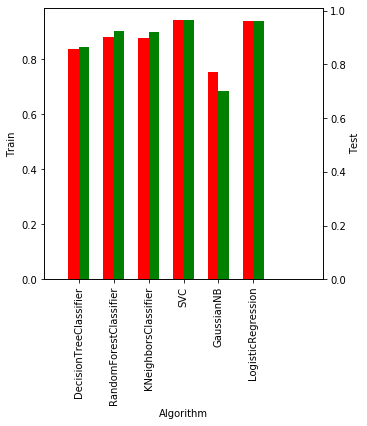

In [19]:
#Baseline Comparing model accuracy using all features accross classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression()
    ]


# Naive Train Accuracy
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,df_traindata,df_trainlabel, cv=5).mean())
warnings.filterwarnings('ignore')
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')


# Naive Test Accuracy

algo = []
scores = []

for clf in classifiers:
    clf = clf.fit(df_traindata, df_trainlabel)
    y_pred = clf.predict(df_testdata)
    algo.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, df_testlabel))
warnings.filterwarnings('ignore')
Naivescore_df_Test  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')

# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(5,5)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Naivescore_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
Naivescore_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,7)
plt.show()

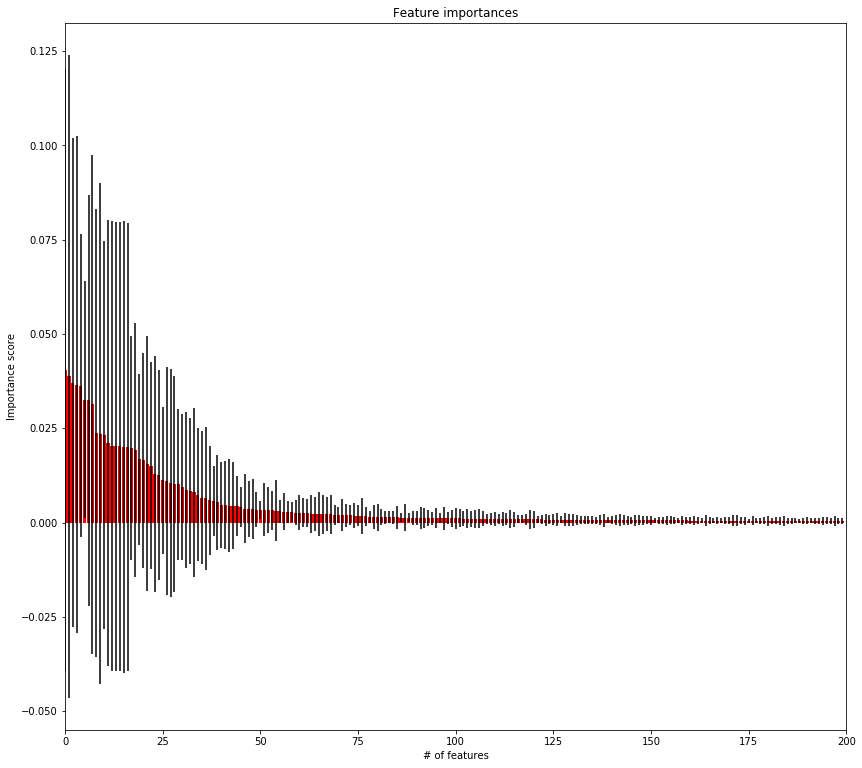

In [20]:
# Feature selection using Random Forest Classifer
# Bagged decision trees for feature importance - embedded method
Rtree_clf_1 = RandomForestClassifier()
Rtree_clf = Rtree_clf_1.fit(df_traindata, df_trainlabel)
model = SelectFromModel(Rtree_clf,prefit = True)
RF_tree_featuresTrain = df_traindata.loc[:,model.get_support()]
RF_tree_featuresTest = df_testdata.loc[:,model.get_support()]

# Feature Importance

importances = Rtree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rtree_clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
indices.shape
indices = indices[:200]

#Plot feature importances

plt.figure(1, figsize=(14,13))
plt.title('Feature importances')
plt.xlabel('# of features')
plt.ylabel('Importance score')
plt.bar(range(200), importances[indices],color='r',yerr=std[indices],align='center')
plt.xlim([0,200])
plt.show()

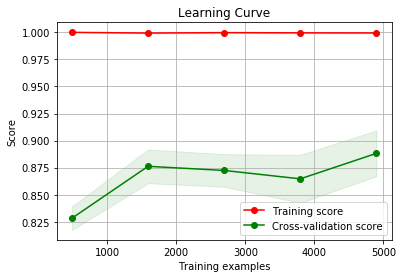

In [21]:
skplt.estimators.plot_learning_curve(Rtree_clf_1,RF_tree_featuresTrain,df_trainlabel)

In [22]:
# Train Accuracy
print('Train Accuracy:',cross_val_score(Rtree_clf_1,RF_tree_featuresTrain,df_trainlabel,cv=5).mean())

# Test Accuracy
Rtree_clf_1 = Rtree_clf_1.fit(RF_tree_featuresTrain, df_trainlabel)
y_pred = Rtree_clf_1.predict(RF_tree_featuresTest)
ac_score = accuracy_score(y_pred, df_testlabel)
print('Test Accuracy:', accuracy_score(y_pred,df_testlabel))

Train Accuracy: 0.8974564089280319
Test Accuracy: 0.8937902952154734


Accuracy: 0.893790
Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  0 406  85   0   0   0]
 [  0  64 467   1   0   0]
 [  0   0   0 476   8  12]
 [  0   0   0  22 350  48]
 [  0   0   0  63  10 398]]


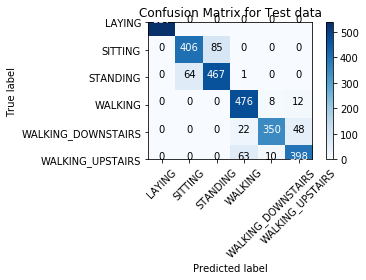

In [23]:
# Confusion Matrix
cf_mat = confusion_matrix(df_testlabel,y_pred)
print('Accuracy: %f' %ac_score)
activities = le.classes_

#Plotting Confusion matrix heatmap
def plot_confusion_matrix(cm,classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cf_mat, classes=activities,title="Confusion Matrix for Test data")

In [24]:
# Applying RFECV with svm classifier
svc=SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), # Stratified fold inorder to reduce bias
              scoring='accuracy')
rfetrain=rfecv.fit(RF_tree_featuresTrain, df_trainlabel)
print('Optimal number of features :', rfecv.n_features_)


# Plot showing the Cross Validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of cordata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEbCAYAAADXk4MCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3deZxcZZn3/8+3q9d0NrKwJUBCCCIqghMBhXHABQEVcEMZdxiZUREcR3/CMw4qjj+3cdeZR8SFYRAHXEYGEVAEVFRIQFlCWELYwpKls/beXXU9f5xTnUqn03069KnqTn/fr1e9qs6pc6quqq4+17mXc9+KCMzMbPKqq3UAZmZWW04EZmaTnBOBmdkk50RgZjbJORGYmU1yTgRmZpOcE4GZ2SRXn2UjSXsCxwD7Al3AvcCyiCjlGJuZmVWBhrugTNLxwPnALODPwFqgGTgYWAT8GPhSRGzJP1QzM8vDSIngi8A3IuLxIZ6rB14LFCLiJ/mFaGZmeRo2EZiZ2e4vU2OxpPMkTVfiu5LulHRC3sGZmVn+svYaOjNtBzgBmAu8B/hcblGZmVnVZE0ESu9PBr4fEXdVrDMzswksayK4Q9INJIngeknTAHcdNTPbDWRqLJZUBxwOrIqITZJmA/Mi4u68AzQzs3xluqAsIkqS1gCHpt1GzcxsN5H1yuLPA28B7gOK6eoAfptTXGZmViVZq4YeAA6LiJ78QzIzs2rK2li8CmjIMxAzM6uNrPX9ncBfJN0IDJQKIuLcXKIyM7OqyZoIrk5vZma2m8k81pCkRpJRRwEeiIi+3KIyM7OqydpYfBxwKfAoyRXF+wHvigj3GjIzm+CyJoI7gL+NiAfS5YOBKyLir3KOz8zMcpa111BDOQkARMSDuBeRmdluIWtj8TJJ3wUuS5ffBtyRT0jDmzNnTixYsKAWb21mNmHdcccd6yNi7lDPZU0E7wM+AJxL0kbwW+Dfxya80VmwYAHLli2rxVubmU1Ykh7b2XNZxxrqAb6c3szMbDcybCKQdGVEnC7pHpKxhbYTEYflFpmZmVXFSCWC89L71+YdiJmZ1cawvYYi4un04fsj4rHKG/D+/MMzM7O8Ze0++qoh1p00loGYmVltjNRG8D6SM/8DJVXORjYNuDXPwMzMrDpGaiP4IfBL4LPA+RXrt0bEhtyiMjOzqhk2EUTEZmAzcAaApD2BZmCqpKkR8Xj+IVo1bOzo5Z4nN9Pe009vf4ne/hI9xdLA497+EnWCWVMbmd3ayKzWJhbMmcKe05prHbqZPUtZp6p8Hck1BPsCa4EDgBXA8/ILbfcXEVy//BluXdnGyw/Zk79ePIf6Qt3Ac39c1caVS5/gyU1dNNbX0Vioo6m+wMwpDew5rYm505vZZ3ozxxw0h5bGQub3XLu1h0fXd/BYWyd/fmITyx7dwENr23fpMxw4t5WjFs7m6ANn0dxQoK29lw0dPWzu6mPmlEb2ndnM3tNbmDezhXl7tFCo0y69j5nlJ+uVxf8KHA38OiKOkHQ8aSlhOJJOBL4GFIBLIuJzg54/APgeMBfYALw9IlaPIv4J647HNvLZa1ew7LGN1NeJy/70GHOnNXHa4fsyq7WJ/176OI+2dTKjpYHn7jON7r4SW7r66ekvsqGjj7aOHsrjBc5oaeAtL96Pdxx9APvNmjLwHt19RR5e1849qzdz1+rN3PPkJlaubae7rzSwzbTmepYcsAenHTGPI/afyazWRhoLdUniqa+jqVCgsb6OhoIoRrAxfe+29l5WPL2F2x7ZwDV3PcUVt29fOGyqr6Onv7Tdusb6OhbNncrBe03lgNmtzJnayKzWRma3NjGlsYDSHBEB69t7eHJTF6s3dvH05m4KgpbGAi0N9dQXRFt7L2u3drNuaw9NDQXOPGYBrz1s35okmohgXXsPT23q5pC9p9HckC0pm40XWUcfXRYRSyTdBRwRESVJt0fEkcPsUwAeJOlxtBpYCpwREfdVbHMVcE1EXCrp5cB7IuIdw8WyZMmSmKhDTEQEyx7byPd+/wi/vPcZ5k5r4sOvOpjXHzGPWx5cx0/uWM1ND6ylrxgcuWAWZxy1Hyc9f58hDyz9xRIbOnp5aG07P7ztca5b/gwRwV8dsAftPUWe2dzFxs5tU0ZMb67nsPkzOWTvaRwwewoHzG7lgNlT2G+PKdQ9y4NnsRTc/8wWImBWa3Jwb24o0NnbzzObu3lmczerN3axcl07D63ZykNr21m9sSvTazfW17HPjGYioLO3SHdfkd5iiTmtjcyd3szcqU081tbBQ2vbWTS3lQ++fDGve+GOCaG/WKKzr0hXb5EtXX1s6upjc2cfGzp6BxLO6o2dbOnuZ48pDWmCamR6S8N2ibFYCjp7i3T1FWnv7mfV+nbuf3orbR29ADQ31PHSRXM4/jlzOerA2UxvbqCloUBLY4GGgpB27bsuloKuNP6u9P07e/sHHrc21TN/jxb2nt48UKrMqvK76epNvt9iKSiWgv5SsLGjl3Vbe1i7tZtNnX3MmdbEvJktyfvNaKa5vjDw/dTXif5032Ip6OkvpXH3091XoqWxkHyvzQ0Dv7tiKejo7aezp0h/adt7NxTqmDutaYfff7EUbOrspae/tN37PLK+Y+D39eSmLgp1GvjbNdXX0dJYYEpjIf171A88bm6oY0tXP09v7uaZLV2s3dJDKYL6ujrq6qC+ro7mhsp9CwMl9PLnbizU0dSQ3Ff+9koBmzp72dDRS1t7L5u7+oiKa3OLJegtlujrL9FbLNFfLG33/ZX/BuXHHzvpObz+iPm79BuSdEdELBnyuYyJ4NfAaSSNxnNIqodeHBEvHWaflwCfjIhXp8sXAETEZyu2WQ68OiJWK/kP2RwR04eLZSIkgq3dfTy6vnPgR1KK4Ibla7hq2ROsWt9Ba2OB977sQN771wfS2rR9oWxjRy/tPf3bndln8dSmLi6/7TF+v7KNOa2N7D2jmX1mNLP/7FYOmzeDA2ZP2eWDUB76iyU2pgfitvYeuvqK2z2/R2sj8/doYU5r04iJqlQKfnnvM3z9xod4YM1WAOrrRCG99RVL9BV3/juXYO/pzczfo4UZLQ3bxbW1p5+h/kUaC8mBZcHsKRyy93QO2Wcae01v5vZHNvCb+9fy+IbOId+nIFFXJ+rrRGtTPbNbG5k9NWlzmdqUlHhaGuso1NXx5MYuHt+QVOGt3dqzYxBDKNSJvac301hflxxUi0Fx0AcoBdvaftKDflYtDYUd/la7olAnZrQ00NNXpKN3+Neb1lzPntOakMSGjl42dvYO+TcpmzezhQNmT6EUMfAZu/tKdKUnEuVEPlhLQ4F9Zjaz57Qm6uvqBg6+faXy/v0Dybg3bT/L+tXV14lZrY3MaGnYLlFIShOJ0kSalL7rtO33m/yW6yjUweuPmM9LFs3O9qaDjEUiaAW6SK47eBswA7g8ItqG2edNwIkR8Xfp8juAoyLinIptfgjcFhFfk/QG4CfAnOFed7wngs7efk74ym+HPON98YI9OH3JfrzmsH2Y0pi1Vs6yKpWCX61Yw71Pbk7+iSMoFoOG+jqmpGdyLY0Fpjc3MHNKAzNaGthjSiN7pQfOnekvlgb+8Qt1oqWhMOxZd0Swan0H9z65mc7e9MDT27/tDDaNa2t3P20dSZvKxs4+2nuSM/zO3n5KAXtNb+KAWUnJbd+ZLbQ2JWeyLQ3JmemU9PM0NxRo7+5n9cZOntzUxZMbu+gvxUAyrJOoPAeQ2L76rz55rfJZb2N9HYWKA9HMKY1Jm1R6dt7e08+TaQlqzZYeevqLA4ll4H0LoiANnIm3NNbTXF9HZ29xu8/c0lBgalM905rrk1JTXd3A+/b2l1jX3jNQGimXOGenpc6WxsLAAbK+ro4DZk9h0dypO5xc7ey30tNforO3n87eItNbGpjeXD/qk6X+YomeiqSaJIdtx1SRJLzpLaN/7bE2XCLIejTaE3g6IrqBSyW1AHsBOz1gk4xSOtjgrPMR4JuS3k0youmTQP8OLySdDZwNsP/++2cMuTa+ddNKVm/s4tOnPZ9ZUxrpLRbpKyZVNovmTq11eLu1ujrx6uftzauft/eYvm59oY76Qh1TGrNtL4lFc6fu8t87IjkTHW0VT7VMbarnOXtP4zl7T6t1KLusrk4DJwa7dn6dKP82WpvGLLSayJoIrgIqq4GK6boXD7PPapIpLcvmA09VbhARTwFvAJA0FXhj2mWVQdtdDFwMSYkgY8xV9+j6Dr7z20d4/RHzeMfRB9Q6HJugJFFfGD/VeLb7y3rKUR8RveWF9PFI50dLgcWSFqYT378VuLpyA0lzJJVjuICkB9GE9elr7qOhIC446ZBah2JmllnWRLBO0inlBUmnAuuH2yEi+oFzgOtJrjm4MiKWS7qo4rWOAx6Q9CBJVdNnRhn/uPGb+9dw4/1rOfcVi9lzui+yMrOJI2tj8SLgcpILygQ8AbwzIlbmG96OxmNjcU9/kVd/5bfU1YnrznvZsA2PZma18KwbiyPiYeDotB5fEbF1LAOcyLZ29/Gv16zg0bZO/vPMI50EzGzCGWn00bdHxH9J+vCg9QBExKSdurJUCn5852q+cN0DrG/v4axjF/Kyg4ecF9rMbFwbqURQvqpp4vYTy8HqjZ28//I7uXv1Zo7YfybffdcSXrjfzFqHZWa2S0ZKBIvS+/si4qq8g5koLvndI9z/zFa++pbDOfXwfWt+oYiZ2bMxUoX2yZIaSLp2GsnFPr9esYa/PmgOpx0xz0nAzCa8kUoE15F0E22VtKVivYAYaVyg3dGDa5IB095/3EG1DsXMbEyMNHn9RyNiBvCLiJhecZs2GZMAwK9XrAHgFc/ds8aRmJmNjUx9HSPi1LwDmShuXLGGF8ybwV6+aMzMdhPDJgJJv0/vt0rakt6Xb1uG23d3tL69hz8/scmlATPbrYw0Z/Gx6b27jwK/uX8tEfDK5+5V61DMzMZMpqohSYskNaWPj5N0rqRJ13H+xhVr2GdGM8/bd1I2j5jZbirreAg/AYqSDgK+CywEfphbVONQd1+R3z20npcfsqe7jJrZbiVrIiilo4m+HvhqRPwjsE9+YY0/f1rVRmdv0dVCZrbbyZoI+iSdAbwLuCZd15BPSOPTjSvW0tJQ2OX5Qs3MxqusieA9wEuAz0TEI5IWAv+VX1jjS0Rw44o1HLt4Ds0NhVqHY2Y2prIOQ30fcC6ApD2AaRHxuTwDGy/Wbe3hP25+mKc2d/OhVx5c63DMzMZcpkQg6WbglHT7v5DMWHZLRHx42B0nsLVbu/n2Lau4/LbH6O0v8YYXzeOUw/etdVhmZmMu6+T1MyJii6S/A74fEZ+QdHeegdVSd1+R13z992zo6OXUw/flnOMP4sC5U2sdlplZLrImgnpJ+wCnA/+cYzzjwsq17azb2sOXT38hb3jR/FqHY2aWq6yNxReRTEK/MiKWSjoQeCi/sGpr5dp2AF4wb0aNIzEzy1/WxuKrgKsqllcBb8wrqFp7cM1W6uvEgjmttQ7FzCx3WRuLm4GzgOcBA8NuRsSZOcVVUw+uaWfhnFYaCp6I3sx2f1mPdJcBewOvBm4B5gNb8wqq1lau3crBe3mcPTObHLImgoMi4l+Ajoi4FHgN8IL8wqqd7r4ij23o5KA93UvIzCaHzENMpPebJD0fmAEsyCWiGnt4XTsRuERgZpNG1u6jF6dXFP8LcDUwFbgwt6hq6KE1SY+hxXu5RGBmk0PWXkOXpA9vAQ7ML5zaG+gxNNs9hsxschg2EUgadgiJiPjy2IZTew+tbWfBnFYa691jyMwmh5FKBJOuovyhNVs51DOQmdkkMtKcxZ96Ni8u6UTga0ABuGTwiKWS9gcuBWam25wfEdc+m/d8Nrr7ijy+oZNTDp9XqxDMzKou65zFl1bOUSxpD0nfG2GfAvAt4CTgUOAMSYcO2uzjwJURcQTwVuDfRxP8WHt4XTulgIPdUGxmk0jWivDDImJTeSEiNgJHjLDPkSRjE62KiF7gR8Cpg7YJoFwPMwN4KmM8uSj3GHLXUTObTLImgrq0+ygAkmYxcvvCPOCJiuXV6bpKnwTeLmk1cC3wwYzx5OKhte4xZGaTT9ZE8CXgD5I+Leki4A/AF0bYR0Osi0HLZwA/iIj5wMnAZZJ2iEnS2ZKWSVq2bt26jCGP3oNr3GPIzCafTEe8iPhPktFG1wDrgDdExGUj7LYa2K9ieT47Vv2cBVyZvscfSQa0mzPE+18cEUsiYsncuXOzhLxLVq5tZ7GHljCzSSbrlcXleYvvG8VrLwUWpxPdP0nSGPy3g7Z5HHgF8ANJzyVJBPmd8g+ju6/IY20dvO6Fno7SzCaX3OpAIqIfOIdkQpsVJL2Dlku6SNIp6Wb/BLxX0l3AFcC7I2Jw9VFVrFrXQSlwicDMJp3MJYJdkV4TcO2gdRdWPL4POCbPGLJ6aG0yqrZ7DJnZZJP1OoLPZ1k3kT24ZiuFOrFgzpRah2JmVlVZq4ZeNcS6k8YykFp7aE07C2ZPoam+UOtQzMyqaqRB594HvB9YJOnuiqemkXQh3W08vK7dk9GY2aQ0UhvBD4FfAp8Fzq9YvzUiNuQWVQ2s29rDsQft0HPVzGy3N2zVUERsjohHSQaO2xARj0XEY0CfpKOqEWA19PaX2NLdz+ypTbUOxcys6rK2EfwH0F6x3JGu2y1s6OgFYFZrY40jMTOrvqyJQJX9+yOiRM5dT6tpfXsPAHOmOhGY2eSTNRGsknSupIb0dh6wKs/AqqlcInDVkJlNRlkTwT8ALyUZKmI1cBRwdl5BVVtbR1IimO2qITObhLJOXr+WZKyg3VJbu0sEZjZ5Zb2y+GBJN0q6N10+TNLH8w2teta399JQENObd5tmDzOzzLJWDX0HuADoA4iIu9mNSght7T3Mbm1CGmoKBTOz3VvWRDAlIm4ftK5/rIOplbaOXncdNbNJK2siWC9pEekMY5LeBDydW1RV1tbew2x3HTWzSSprpfgHgIuBQyQ9CTwCvC23qKqsraOXA+d6nCEzm5xGTATpHMJLIuKVklqBuojYmn9o1dPW3uuuo2Y2aY1YNZReRXxO+rhjd0sCnb39dPUV3XXUzCatrG0Ev5L0EUn7SZpVvuUaWZVsu4bAJQIzm5yythGcmd5/oGJdAAeObTjV53GGzGyyy9pG8PaIuLUK8VRduUQwq9VVQ2Y2OWVtI/i3KsRSEwMDzrmx2MwmqaxtBDdIeqN2w0tv15cHnHPVkJlNUlnbCD4MtAJFSV2AgIiI6blFViVt7b1MaSwwpdHjDJnZ5JR19NFpeQdSK76q2Mwmu8ynwZJOAV6WLt4cEdfkE1J1tXX0MtsNxWY2iWUdhvpzwHnAfentvHTdhLe+vdddR81sUstaIjgZODztQYSkS4E/A+fnFVi1tLX38IJ5E76pw8xsl2XtNQQws+LxjLEOpBYigg0dvR5ewswmtawlgs8Cf5Z0E0mPoZeRTFQzoW3p6qe/FL6GwMwmtay9hq6QdDPwYpJE8LGIeCbPwKqhfA3BHJcIzGwSy9pY/HqgMyKujoifA92STsuw34mSHpC0UtIO7QmSviLpL+ntQUmbRv8Rdp0HnDMzy95G8ImI2FxeiIhNwCeG20FSAfgWcBJwKHCGpEMrt4mIf4yIwyPicOAbwE9HE/yz1ZYOOOfuo2Y2mWVNBENtN1K10pHAyohYFRG9wI+AU4fZ/gzgiozxjIn16ThD7j5qZpNZ1kSwTNKXJS2SdKCkrwB3jLDPPOCJiuXV6bodSDoAWAj8JmM8Y6JcItjDjcVmNollTQQfBHqB/wauBLrYfm6CoQw1QF3sZNu3Aj+OiOKQLySdLWmZpGXr1q3LGPLINnT0MqOlgYbCaHrRmpntXrL2Gupg9BePrQb2q1ieDzy1k23fyjCJJSIuBi4GWLJkyc6Syai1tfe6odjMJr08T4WXAoslLZTUSHKwv3rwRpKeA+wB/DHHWIa0vr2HOW4oNrNJLrdEEBH9JJPeXw+sAK6MiOWSLkoHsCs7A/hRRIzZmX5WbR0uEZiZDVs1JOnzEfExSW+OiKtG++IRcS1w7aB1Fw5a/uRoX3estLX3cPSBs2r19mZm48JIJYKTJTWwGwwnMVh/scTGzj5fQ2Bmk95IjcXXAeuBVklbSGcmYzeYoWxDp68hMDODEUoEEfHRiJgB/CIipkfEtMr7KsWYi/Kk9bNcIjCzSS5r99FTJe1FMugcwG0RMXYd+mvA4wyZmSWyDjr3ZuB24M3A6cDtkt6UZ2B5W99eHnnUicDMJres8xF8HHhxRKwFkDQX+DXw47wCy9tAicBVQ2Y2yWUedK6cBFJto9h3XGrr6KFQJ2a0NNQ6FDOzmspaIrhO0vVsGx30LQy6PmCiaWvvZVZrI3V1Qw2JZGY2eWRtLP6opDcAx5J0Hb04In6Wa2Q529zV59KAmRnZSwRExE+p8sQxeeruK9LSUKh1GGZmNTeh6/mfja6+Is0Nk/bjm5kNmLRHwu6+Es0uEZiZZU8EkholHSbpBemw0hNad1/RicDMjIxtBJJeA/xf4GGSxuKFkv4+In6ZZ3B5chuBmVkia2Pxl4DjI2IlgKRFwC+ACZsI3EZgZpbIeiRcW04CqVXA2p1tPBF095VcIjAzY+SJad6QPlwu6VqSieuDZMyhpTnHliu3EZiZJUaqGnpdxeM1wN+kj9eRzDM8IZVKQU+/ew2ZmcEIiSAi3lOtQKqpp78E4ERgZkb2XkNzgfcCCyr3iYgz8wkrX119RQBa3FhsZpa519DPgd+RDD1dzC+c6uhOE4FLBGZm2RPBlIj4WK6RVNFAiaDRicDMLGvdyDWSTs41kioqlwia6p0IzMyyJoLzSJJBl6QtkrZK2pJnYHnaVjXkNgIzs6zzEUzLO5Bq6u5Leg35gjIzsxFKBJIWjPC8JM0fy4CqoavXjcVmZmUjlQi+KKmOpNfQHSQXkjUDBwHHA68APgGszjPIsdbd78ZiM7OykS4oe7OkQ4G3AWcC+wCdwAqSOYs/ExHduUc5xgZKBG4sNjMbuY0gIu4D/rkKsVRNd/nK4kY3FpuZ5XoklHSipAckrZR0/k62OV3SfZKWS/phnvGUdbuNwMxsQObJ60dLUgH4FvAqkjaEpZKuTksY5W0WAxcAx0TERkl75hVPpe6BISacCMzM8iwRHAmsjIhVEdEL/Ag4ddA27wW+FREbASKiKnMcdPUVKdSJhoKrhszMMh0J026ib5d0Ybq8v6QjR9htHvBExfLqdF2lg4GDJd0q6U+STswa+LPhSWnMzLbJekr878BLgDPS5a0k1T7D0RDrYtByPbAYOC597UskzdzhhaSzJS2TtGzdunUZQ945T1NpZrZN1qPhURHxAaAbIK3KaRxhn9XAfhXL84Gnhtjm5xHRFxGPAA+QJIbtRMTFEbEkIpbMnTs3Y8g71+PZyczMBmRNBH1p42/AwPwEpRH2WQoslrRQUiPwVuDqQdv8D8mFaUiaQ1JVtCpjTLusu9+JwMysLGsi+DrwM2BPSZ8Bfg/8/8PtEBH9wDnA9SQXoF0ZEcslXSTplHSz64E2SfcBNwEfjYi2Xfgco9LVW3QbgZlZKuugc5dLuoNkSAkBp0XEigz7XUtyBXLlugsrHgfw4fRWNd19JbcRmJmlRkwE6VhDd0fE84H78w8pf119RaY153YJhZnZhDLiaXFElIC7JO1fhXiqotuNxWZmA7KeFu8DLJd0O9BRXhkRp+x8l/Gru89tBGZmZVkTwadyjaLK3EZgZrZN1sbiWyTtBbw4XXV7tYaDyEOXSwRmZgOyDjFxOnA78GbgdOA2SW/KM7A8uY3AzGybrFVD/wy8uFwKSC8o+zXw47wCy0upFPT0l2hyIjAzA7JfUFY3qCqobRT7jis9/Z643sysUtYSwXWSrgeuSJffAvwyn5Dy1dVXnpRmQuYxM7Mxl7Wx+KOS3gAcS3Jl8cUR8bNcI8uJJ6UxM9tepkQgaSFwbUT8NF1ukbQgIh7NM7g8bCsROBGYmUH2ev6r2H600WK6bsLpdiIwM9tO1kRQn043CUD6eKT5CMalbrcRmJltJ+vRcF3F0NFIOhVYn09I+eruc68hM7NKWXsN/QNwuaRvkjQWPwG8M7eoctTV66ohM7NKWXsNPQwcLWkqoIjYmm9Y+enuT3sNNToRmJlB9iEmzpM0nWTk0a9IulPSCfmGlo9y1VBzvROBmRlkbyM4MyK2ACcAewLvAT6XW1Q5Gug+2ujGYjMzyJ4IlN6fDHw/Iu6qWDeh9Lj7qJnZdrImgjsk3UCSCK6XNI3tryuYMMqNxe41ZGaWyNpr6CzgcGBVRHRKmk1SPTThdPcXKdSJhoKrhszMIHuvoRJwZ8VyG8kIpBNOV2/JpQEzswqT7rS4u7/oq4rNzCpMuiNid69nJzMzq5S1jQBJBWCvyn0i4vE8gspTUiJwIjAzK8s6DPUHgU8Aa9jWWyiAw3KKKzddvZ643sysUtYSwXnAc9JG4gmtu6/kNgIzswpZj4hPAJvzDKRauvpcNWRmVilriWAVcLOkXwA95ZUR8eVcospRd1+RudOaah2Gmdm4kTURPJ7eGpmgE9KUdbtEYGa2nawXlH0KIB1aIiKiPct+kk4EvgYUgEsi4nODnn838EXgyXTVNyPikmyh75ruvhItbiMwMxuQtdfQ84HLgFnp8nrgnRGxfJh9CsC3gFcBq4Glkq6OiPsGbfrfEXHOrgS/K9xGYGa2vaynxhcDH46IAyLiAOCfgO+MsM+RwMqIWJXOcfwj4NRdD3VsdPe5+6iZWaWsiaA1Im4qL0TEzUDrCPvMI+ltVLY6XTfYGyXdLenHkvbLGM8uKZWCnv4STU4EZmYDsiaCVZL+RdKC9PZx4JER9hlqvoIYtPy/wIKIOAz4NXDpkC8knS1pmaRl69atyxjyjnr6PXG9mdlgmWcoA+YCPwV+lj4eaRjq1UDlGf584KnKDSKiLSLK3VG/A/zVUC8UERdHxJKIWDJ37tyMIe+oe2BSGjcWm5mVZe01tBE4d5SvvRRYLGkhSa+gtwJ/W7mBpH0i4ul08RRgxSjfY1TK01S6RGBmts2wiUDSVyPiQ5L+lx2rdYiIU3a2b0T0S3fe7NAAABBnSURBVDoHuJ6k++j3ImK5pIuAZRFxNXCupFOAfmAD8O5d/ygj6/Y0lWZmOxipRHBZev9vu/LiEXEtcO2gdRdWPL4AuGBXXntXdDkRmJntYNhEEBF3pA8Pj4ivVT4n6TzglrwCy0N3X9JY7DYCM7Ntsh4R3zXEunePYRxV0e02AjOzHYzURnAGSQPvQklXVzw1jQk4Z7HbCMzMdjRSG8EfgKeBOcCXKtZvBe7OK6i8DPQaanQiMDMrG6mN4DHgMeAl1QknXwNtBPVOBGZmZZnaCCQdLWmppHZJvZKKkrbkHdxYG+g11OjGYjOzsqxHxG8CZwAPAS3A3wHfyCuovPS4jcDMbAdZJ6YhIlZKKkREEfi+pD/kGFcuunrda8jMbLCsiaBTUiPwF0lfIGlAHmn00XGnu79IoU40FFw1ZGZWlvWI+A6SYSLOATpIBpN7Y15B5aWrt0RzvZOAmVmlrIPOPZY+7AI+lV84+eruL7rrqJnZICNdUHYPQww2V5bOIzBhdPcWaXLXUTOz7YxUInhtev+B9L48CN3bgM5cIsqRSwRmZjvKckEZko6JiGMqnjpf0q3ARXkGN9a6eosecM7MbJDMcxZLOra8IOmlTMReQ30ldx01Mxska/fRs4DvSZqRLm8imb5yQunuLzK1KfOlE2Zmk0LWXkN3AC+UNB1QRGzON6x8dPUWmTO1qdZhmJmNKyP1Gnp7RPyXpA8PWg9ARHw5x9jGXE9/ycNLmJkNMlKJoNwOMC3vQKqhq7dIixuLzcy2M1KvoW+n9xP2IrJK3f1FlwjMzAYZqWro68M9HxHnjm04+UpKBE4EZmaVRqoaumOE5yeMUino6S/R5ERgZradkaqGLq1WIHnr6U9mJ3OJwMxse5m6j0qaC3wMOBRoLq+PiJfnFNeY2zZxvRuLzcwqZT0qXg6sABaSjD76KLA0p5hyMTBxvUsEZmbbyZoIZkfEd4G+iLglIs4Ejs4xrjHX7WkqzcyGlHW8hb70/mlJrwGeAubnE1I+upwIzMyGlDUR/Gs6ztA/kUxaPx34x9yiykF3X9JY7DYCM7PtZU0Et6XjC20Gjs8xntx0u43AzGxIWU+P/yDpBklnSdoj64tLOlHSA5JWSjp/mO3eJCkkLcn62qPlNgIzs6FlSgQRsRj4OPA84A5J10h6+3D7SCoA3wJOIul2eoakQ4fYbhpwLnDbKGMfFbcRmJkNLXOFeUTcHhEfBo4ENgAjXWx2JLAyIlZFRC/wI+DUIbb7NPAFoDtrLLui3EbgqiEzs+1lSgSSpkt6l6RfAn8AniY50A9nHvBExfLqdF3l6x4B7BcR12QPedd0+YIyM7MhZW0svgv4H+CiiPhjxn00xLoYeFKqA74CvHvEF5LOBs4G2H///TO+/fZ6yonAk9ebmW0nayI4MCJi5M22sxrYr2J5Psn1B2XTgOcDN6cT3ewNXC3plIhYVvlCEXExcDHAkiVLRhsHAPvPmsJJz9/bVUNmZoNknapyVw6+S4HFkhYCTwJvBf624jU3A3PKy5JuBj4yOAmMlROetzcnPG/vPF7azGxCy63CPCL6gXOA60nGKboyIpZLukjSKXm9r5mZjU7WqqFdEhHXAtcOWnfhTrY9Ls9YzMxsaFl7DX0h7TnUIOlGSetHuo7AzMwmhqxVQydExBbgtSSNwAcDH80tKjMzq5qsiaAhvT8ZuCIiNuQUj5mZVVnWNoL/lXQ/0AW8P52xLNcrgc3MrDqyjjV0PvASYElE9AEdDD1chJmZTTBZG4vfDPRHRFHSx4H/AvbNNTIzM6sKZblWTNLdEXGYpGOBzwL/BvyfiDgq7wCHiGUd8FjGzecA63MM59kYr7E5rtFxXKPjuEZnLOM6ICLmDvVE1jaCYnr/GuA/IuLnkj45FpGN1s4+yFAkLYuI3OY4eDbGa2yOa3Qc1+g4rtGpVlxZew09KenbwOnAtZKaRrGvmZmNY1kP5qeTDBVxYkRsAmbh6wjMzHYLWXsNdQIPA6+WdA6wZ0TckGtkY+PiWgcwjPEam+MaHcc1Oo5rdKoSV9bG4vOA9wI/TVe9Hrg4Ir6RY2xmZlYFmXsNAS+JiI50uRX4Y0QclnN8ZmaWs6xtBGJbzyHSx0PNQDZuSDpR0gOSVko6v4ZxfE/SWkn3VqybJelXkh5K7/eoQVz7SbpJ0gpJy9NSX81jk9Qs6XZJd6VxfSpdv1DSbWlc/y2psZpxVcRXkPRnSdeMl7gkPSrpHkl/kbQsXTcefmMzJf1Y0v3p7+wltY5L0nPS76l82yLpQ7WOK43tH9Pf/L2Srkj/F6ry+8qaCL4P3Cbpk2m30T8B380joLEgqQB8CzgJOBQ4Q9KhNQrnB8CJg9adD9wYEYuBG9PlausH/ikingscDXwg/Y5qHVsP8PKIeCFwOHCipKOBzwNfSePaCJxV5bjKziOZX6NsvMR1fEQcXtHVsNZ/R4CvAddFxCHAC0m+t5rGFREPpN/T4cBfAZ3Az2odl6R5wLkkozc8HyiQTOZVnd9XRGS6AS9KAz0POCLrfrW4kQyHcX3F8gXABTWMZwFwb8XyA8A+6eN9gAfGwXf2c+BV4yk2YApwJ3AUyUU19UP9fasYz3ySg8TLgWtISsXjIa5HgTmD1tX07whMBx4hrX4eL3ENiuUE4NbxEBcwD3iCpEdmffr7enW1fl8jlggk1Um6NyLujIivR8TXIuLPI+1XY+UvtWx1um682CsingZI7/esZTCSFgBHALcxDmJLq1/+AqwFfkXSY21TJLPeQe3+nl8F/j+glC7PHidxBXCDpDsknZ2uq/Xf8UBgHfD9tCrtkrRtsdZxVXorcEX6uKZxRcSTJCM2PA48DWwG7qBKv68RE0FElIC7JO2fRwA5Gar9Ypcmvd/dSZoK/AT4UCRzTtRcRBQjKbrPB44EnjvUZtWMSdJrgbURcUfl6iE2rcXv7JiIeBFJVegHJL2sBjEMVk9Si/AfEXEEyUCVNWurGyytaz8FuKrWsQCkbRKnAgtJxnFrJfl7DpbL7yvrEBP7AMsl3U7yB00iihivcw+vBvarWJ4PPFWjWIayRtI+EfG0pH1IznyrTlIDSRK4PCLKXYPHRWwAEbFJ0s0kbRgzJdWnZ0e1+HseA5wi6WSgmaTq46vjIC4i4qn0fq2kn5Ekz1r/HVcDqyPitnT5xySJoNZxlZ0E3BkRa9LlWsf1SuCRiFgHIOmnwEup0u8ra2Pxp0hmJ7sI+FLFbbxaCixOW9wbSYqAV9c4pkpXA+9KH7+LpH6+qiSJpMF/RUR8ebzEJmmupJnp4xaSf5AVwE3Am2oVV0RcEBHzI2IBye/pNxHxtlrHJalV0rTyY5J673up8d8xIp4BnpD0nHTVK4D7ah1XhTPYVi0EtY/rceBoSVPS/83y91Wd39cIDRgHkRQ7B69/GbComo0pu9D4cjLwIEn98j/XMI4rSOr8+kjOks4iqVu+EXgovZ9Vg7iOJSlm3g38Jb2dXOvYgMOAP6dx3QtcmK4/ELgdWElSnG+q4d/0OOCa8RBX+v53pbfl5d96rf+OaQyHA8vSv+X/AHuMk7imAG3AjIp14yGuTwH3p7/7y4Cmav2+hr2gLO0r/X8i4u5B65cAn4iI1+10ZzMzmxBGqhpaMDgJAETEMpIukWZmNsGNlAiah3muZSwDMTOz2hgpESyV9N7BKyWdRdLH1czMJriR2gj2Irn8updtB/4lQCPw+kh6BpiZ2QSWdfTR44Hnp4vLI+I3uUZlZmZVk3Vimpsi4hvpzUlgkpMUkr5UsfwRjdEc1pJ+IOlNI2/5rN/nzemImDcN8dwX01Egv7gLr3t4etHZuCWpfRf3O21XBm/c1fez6vG8w7YreoA3SJpT60AqpaPOZnUW8P6IOH6I5/4eeFFE7Mp0rIeTXI+RmRIT4X/xNJLRfG03MxF+fDb+9JNMofePg58YfEZfPhuUdJykWyRdKelBSZ+T9DYlcw/cI2lRxcu8UtLv0u1em+5fSM/Ul0q6W9LfV7zuTZJ+CNwzRDxnpK9/r6TPp+suJLmg7v8OPuuXdDXJOC+3SXpLeqXzT9L3XSrpmHS7IyX9IR1Q7Q9KxrlvJLn6/i1Kxrp/i5Kh2z9S8fr3SlqQ3lZI+neSEVb3k3SCpD9KulPSVek4UKTf1X3p5/63IT7j32jb+Pp/rrjS+KMV39enhvpD7mwbSe9M190l6TJJLyUZm+eL6fssSm/XKRns7neSDkn3XZh+jqWSPj3U+9o4U+2r53yb+DegnWSsnUeBGcBHgE+mz/0AeFPltun9ccAmknGrmoAngU+lz50HfLVi/+tITlIWk1yN3QycDXw83aaJ5IrVhenrdgALh4hzX5JL9+eSjKv1G+C09LmbScZ+H/LzVTz+IXBs+nh/kiE5SD9/eXjgVwI/SR+/G/hmxf6fBD5SsXwvyTU4C0hGMT06XT8H+C3Qmi5/DLiQZFjiB9jWnjdziHj/l3QEAGBq+llPIEnWSr/La4CXDfqbDLkN8Lz0Peek283ayd/2RmBx+vgokmE3IBmu4Z3p4w9Ufp++jc9b1kHnzLYTEVsk/SfJHBVdGXdbGulQv5IeBm5I198DVFbRXBnJqLcPSVoFHEJy0DqsorQxgyRR9AK3R8QjQ7zfi4GbY9tAXpeTHOj+J2O8kBzkD02GfwFgenrGPQO4VNJikqE6GkbxmmWPRcSf0sdHk1S73Jq+VyPwR2AL0A1cIukXJAfrwW4Fvpx+vp9GxGpJJ5B8Z+Uh46eSfF+/rdhvZ9u8EPhxRKwHiIgNg98wLa28FLiq4rtpSu+PAd6YPr6MZHIVG8ecCOzZ+CpJtcb3K9b1k1Y5KjlCVE6t11PxuFSxXGL73+LgrmxBctb6wYi4vvIJScdRMSLuIGMxnWodyXzd2yU7Sd8AboqI1yuZz+Hmnew/8H2kKi/SrIxbwK8i4ozBLyDpSJJByN4KnEMyMc6AiPhcmiROBv4k6ZXp6302Ir49zGcbchtJ5zLycMd1JGPlH76T5z3s+wTiNgLbZemZ4pVsP33eoyRTAEIyvvqunCm/WcmESItIBt16ALgeeJ+SobORdLCS0TaHcxvwN5LmpA3JZwC3jDKWG0gOvqTvWz7wzSCp3oKkOqhsKzCtYvlRknH5kfQikuqsofwJOEbSQem2U9LPOJVkcLRrgQ+RNEZvR9KiiLgnIj5PUmV2CMn3dWZFO8M8SYMnW9nZNjcCp0uana6fNfizRTJ3xSOS3pxuI0kvTLe7lSRpAbxtJ5/XxhEnAnu2vkRSv132HZKD7+0k9cY7O1sfzgMkB+xfAv8QEd3AJSTD8t4p6V7g24xQok2roS4gGcr3LpLx50c7jO+5wJK04fQ+4B/S9V8APivpVpL5ZctuIqlK+oukt5DM9zBLyYxr7yMZEXeoWNeRJJQrJN1NkhgOITnwXpOuu4UhGuiBD6WN0HeRVNP9MiJuIGnf+KOke0jmA6hMUOxsm4hYDnwGuCV9zfIw5T8CPpo2SC8iOciflW6znCTxQ9Lm8wFJS0kSpo1zmS4oMzOz3ZdLBGZmk5wTgZnZJOdEYGY2yTkRmJlNck4EZmaTnBOBmdkk50RgZjbJORGYmU1y/w+fwQ2TO/mMkwAAAABJRU5ErkJggg==rect classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 26


ValueError: Image size of 386x104000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

Train Accuracy: 0.920985274742252
Test Accuracy: 0.9093993892093655


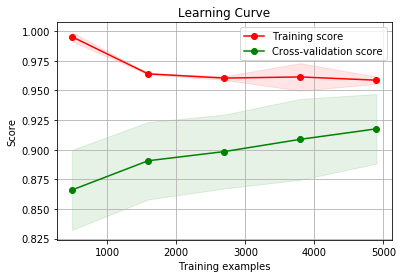

In [25]:
#Applying RFE with optimal number of features
rfe = RFE(estimator=svc, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(RF_tree_featuresTrain, df_trainlabel)

rfe_train=RF_tree_featuresTrain.loc[:,rfe.get_support()]
rfe_test=RF_tree_featuresTest.loc[:,rfe.get_support()]

skplt.estimators.plot_learning_curve(svc,rfe_train,df_trainlabel)

#Checking the Accuracy after rfe
# Train Accuracy
print("Train Accuracy:", cross_val_score(svc,rfe_train,df_trainlabel, cv=5).mean())
#Test Accuracy
svc = svc.fit(rfe_train,df_trainlabel)
y_pred = svc.predict(rfe_test)
print('Test Accuracy:', accuracy_score(y_pred,df_testlabel))

In [26]:
# Variance threshold
selector = VarianceThreshold(0.95*(1-.95))
varsel=selector.fit(rfe_train)
rfe_train.loc[:,varsel.get_support()].shape
vartrain = rfe_train.loc[:, varsel.get_support()]
vartest = rfe_test.loc[:,varsel.get_support()]

#Checking Accuracy after Variance threshold
# Train Accuracy
print('Train Accuracy:',cross_val_score(svc,vartrain,df_trainlabel,cv=5).mean())

# Test Accuracy
scv = svc.fit(vartrain, df_trainlabel)
y_pred = scv.predict(vartest)
print("Test Accuracy:", accuracy_score(y_pred, df_testlabel))

Train Accuracy: 0.9207125203451971
Test Accuracy: 0.9097387173396675


Text(0, 0.5, 'cumulative explained variance')

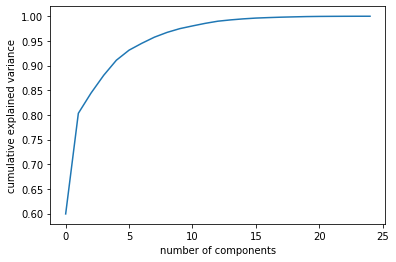

In [27]:
# PCA
pca = PCA(n_components=len(vartrain.columns))
pca_traindata = pca.fit(vartrain)

pca_traindata.explained_variance_
pca_traindata.n_components_
pcatrain = pca_traindata.transform(vartrain)
pcatest = pca_traindata.transform(vartest)
cum_ratio = (np.cumsum(pca_traindata.explained_variance_ratio_))

# Visualize PCA result
plt.plot(np.cumsum(pca_traindata.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
# 18 features - constant after that
pca = PCA(n_components = 18)
pca_traindata = pca.fit(vartrain)

pca_traindata.explained_variance_
pca_traindata.n_components_
pcatrain = pca_traindata.transform(vartrain)
pcatest = pca_traindata.transform(vartest)
(np.cumsum(pca_traindata.explained_variance_ratio_))

array([0.59920579, 0.80321739, 0.84423994, 0.88029215, 0.910895  ,
       0.93124937, 0.94509593, 0.9575934 , 0.9672914 , 0.97486918,
       0.98037073, 0.98557434, 0.98994562, 0.99258987, 0.99468547,
       0.99627957, 0.99726901, 0.99811571])

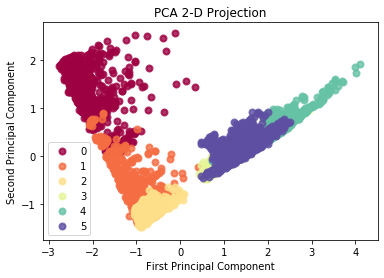

In [29]:
# PCA in 2D projection
skplt.decomposition.plot_pca_2d_projection(pca,vartrain,df_trainlabel)

Train Accuracy: 0.9223440658979756
Test Accuracy: 0.9107567017305734


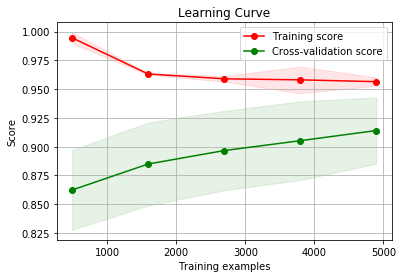

In [30]:
# Checking Accuracy after applying PCA
skplt.estimators.plot_learning_curve(svc,pcatrain,df_trainlabel)

# Train Accuracy
print('Train Accuracy:',cross_val_score(svc,pcatrain,df_trainlabel,cv=5).mean())

# Test Accuracy
scv = svc.fit(pcatrain, df_trainlabel)
y_pred = scv.predict(pcatest)
ac_score = accuracy_score(y_pred, df_testlabel)
print('Test Accuracy:', accuracy_score(y_pred,df_testlabel))

Accuracy: 0.910757
Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  0 380 109   0   0   2]
 [  0  59 473   0   0   0]
 [  0   0   0 492   2   2]
 [  0   0   0   6 379  35]
 [  0   0   0  41   7 423]]


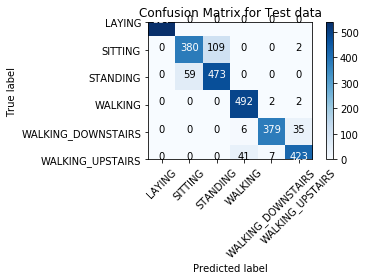

In [31]:
# Confusion Matrix
cf_mat = confusion_matrix(df_testlabel,y_pred)
print('Accuracy: %f' %ac_score)
activities = le.classes_

#Plotting Confusion matrix heatmap
def plot_confusion_matrix(cm,classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cf_mat, classes=activities,title="Confusion Matrix for Test data")

In [32]:
# Parameter Tuning using GridScore
param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svr = SVC()
clf = GridSearchCV(svr, param_grid,cv=5)
clf.fit(pcatrain,df_trainlabel)
print(clf.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [33]:
svr = SVC(kernel="rbf",C=1000,gamma=0.001)
print("Train Accuracy:",cross_val_score(svr,pcatrain,df_trainlabel, cv=5).mean())
# Test Accuracy
scv = svr.fit(pcatrain, df_trainlabel)
y_pred = scv.predict(pcatest)
print("Test Accuracy:",accuracy_score(y_pred, df_testlabel))

Train Accuracy: 0.9230237831866018
Test Accuracy: 0.9104173736002714
